<a href="https://qworld.net" target="_blank" align="left"><img src="./images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b>  <font color="blue"> Solution for </font>Hadamard Operator </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task1"></a>
<h3> Task 1 </h3>

Remember that x-gate flips the value of a qubit.

Design a quantum circuit with a single qubit.

The qubit is initially set to $ \ket{0} $.

Set the value of qubit to $ \ket{1} $ by using x-gate.

Experiment 1: Apply one Hadamard gate, make measurement, and execute your program 10000 times.

Experiment 2: Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

The following two diagrams represent these experiments.

<table>
    <tr>
        <td><img src="./images/photon8.jpg" width="80%"></td>
        <td><img src="./images/photon9.jpg" width="70%"></td>
    </tr>
</table>

<h3>Solution</h3>

<h4>Experiment 1: x-gate, h-gate, and measurement </h4>

Output: 1
(<Figure size 260.988x144 with 1 Axes>, <AxesSubplot:>)
The design of the circuit is done.


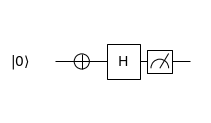

In [1]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define number of qubits and allocate them. Lets name them qreg
qubit = qengine.allocate_qureg(1)

# Apply X-gate to qubit.
X | qubit

# Apply H-gate to qubit
H | qubit

# Flush circuit to backend
qengine.flush()

# Measure qubit value and extract it out
Measure | qubit

# Print the measured output
print("Output: {}".format(int(qubit[0])))

# Print the circuit out
print(qdrawer.draw())

# Confirm circuit run
print("The design of the circuit is done.")

In [2]:
# execute the circuit 10000 times in the local simulator

# Let us create a dictionary to store measurements
measurement_dict = {"Zero":0, "One":0}

# Looping over the circuit 10000 times. Apply gates and measure.
for i in range(10000):
    qdrawer = CircuitDrawerMatplotlib()
    qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

    # Define number of qubits and allocate them. Lets name them qreg
    qubit = qengine.allocate_qureg(1)

    X | qubit
    H | qubit
    qengine.flush()
    Measure | qubit
    
    if (int(qubit[0]) == 0):
        measurement_dict["Zero"] += 1
    else:
        measurement_dict["One"] += 1
             
# Print values
print(measurement_dict)

{'Zero': 4955, 'One': 5045}


<h4>Experiment 2: x-gate, h-gate, h-gate, and measurement </h4>

Output: 1
(<Figure size 314.688x144 with 1 Axes>, <AxesSubplot:>)
The design of the circuit is done.


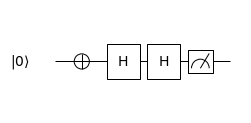

In [4]:
# Import necessary objects and methods for creating circuits 
from projectq import MainEngine
from projectq.ops import H,X,Measure,All
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define number of qubits and allocate them. Lets name them qreg
qubit = qengine.allocate_qureg(1)

# Apply X-gate to qubit.
X | qubit

# Apply H-gate to qubit twice.
H | qubit
H | qubit

# Flush circuit to backend
qengine.flush()

# Measure qubit value and extract it out
Measure | qubit

# Print the measured output
print("Output: {}".format(int(qubit[0])))

# Print the circuit out
print(qdrawer.draw())

# Confirm circuit run
print("The design of the circuit is done.")

(<Figure size 314.688x144 with 1 Axes>, <AxesSubplot:>)
{'Zero': 0, 'One': 10000}


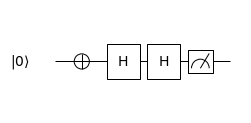

In [5]:
# execute the circuit 10000 times in the local simulator

# Let us create a dictionary to store measurements
measurement_dict = {"Zero":0, "One":0}

# Looping over the circuit 10000 times. Apply gates and measure.
for i in range(10000):
    qdrawer = CircuitDrawerMatplotlib()
    qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())
    
    qubit = qengine.allocate_qureg(1)
    X | qubit
    H | qubit
    H | qubit
    qengine.flush()
    Measure | qubit
    
    if (int(qubit[0]) == 0):
        measurement_dict["Zero"] += 1
    else:
        measurement_dict["One"] += 1
        
print(qdrawer.draw())
# Print values
print(measurement_dict)